In [1]:
#importing libraries
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt
import os 
from keras import layers 
from keras.models import Model
from keras.models import load_model
from keras import callbacks 
import cv2 
import string

In [2]:
DATA_DIR = './generated_captcha_images/'

In [3]:
n=len(os.listdir(DATA_DIR))
n

1136

In [4]:
img = cv2.imread(os.path.join('./generated_captcha_images/D3GC.png'))
img.shape


(24, 72, 3)

In [5]:
imgshape=(24,72,1) 

In [6]:
character= string.ascii_uppercase + "0123456789" 
nchar = len(character)
nchar

36

In [7]:
def preprocess():
  X = np.zeros((n,24,72,1)) 
  y = np.zeros((4,n,nchar))

  for i, pic in enumerate(os.listdir(DATA_DIR)):    
    img = cv2.imread(os.path.join(DATA_DIR, pic), cv2.IMREAD_GRAYSCALE) 
    pic_target = pic[:-4]
    
    if len(pic_target) < 5: 
      img = img / 255.0 
      img = np.reshape(img, (24, 72, 1)) 

      target=np.zeros((4,nchar)) 

      for j, k in enumerate(pic_target):
    
         index = character.find(k) 
         target[j, index] = 1 

      X[i] = img 
      y[:,i] = target 

  return X,y

In [8]:
#create model
def createmodel():
    img = layers.Input(shape=imgshape)
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) 
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) 
    mp3 = layers.MaxPooling2D(padding='same')(bn)  
    
    flat = layers.Flatten()(mp3) 

    outs = []
    for _ in range(4): 
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) 
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) 
    
    
    model = Model(img, outs) 
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [9]:
#Create model
model=createmodel();
model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 72, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 24, 72, 16)   160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 12, 36, 16)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 12, 36, 32)   4640        ['max_pooling2d[0][0]']          
                                                                                              

In [10]:
X,y=preprocess()

In [11]:
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]
y_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]])

In [12]:
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3]], batch_size=32, epochs=60, validation_split=0.2)

Epoch 1/60
25/25 [==============================] - 2s 43ms/step - loss: 14.0676 - dense_1_loss: 3.2075 - dense_3_loss: 3.5971 - dense_5_loss: 3.6362 - dense_7_loss: 3.6268 - dense_1_accuracy: 0.1778 - dense_3_accuracy: 0.0438 - dense_5_accuracy: 0.0271 - dense_7_accuracy: 0.0296 - val_loss: 14.3863 - val_dense_1_loss: 3.6551 - val_dense_3_loss: 3.5781 - val_dense_5_loss: 3.5758 - val_dense_7_loss: 3.5773 - val_dense_1_accuracy: 0.0000e+00 - val_dense_3_accuracy: 0.0000e+00 - val_dense_5_accuracy: 0.0464 - val_dense_7_accuracy: 0.0515
Epoch 2/60
25/25 [==============================] - 1s 29ms/step - loss: 13.4398 - dense_1_loss: 2.8416 - dense_3_loss: 3.4727 - dense_5_loss: 3.5661 - dense_7_loss: 3.5594 - dense_1_accuracy: 0.2178 - dense_3_accuracy: 0.0567 - dense_5_accuracy: 0.0309 - dense_7_accuracy: 0.0258 - val_loss: 14.3747 - val_dense_1_loss: 3.6453 - val_dense_3_loss: 3.5883 - val_dense_5_loss: 3.5688 - val_dense_7_loss: 3.5724 - val_dense_1_accuracy: 0.0000e+00 - val_dense_3_a

25/25 [==============================] - 1s 30ms/step - loss: 2.6557 - dense_1_loss: 0.1326 - dense_3_loss: 0.5740 - dense_5_loss: 1.0727 - dense_7_loss: 0.8765 - dense_1_accuracy: 0.9613 - dense_3_accuracy: 0.8093 - dense_5_accuracy: 0.6469 - dense_7_accuracy: 0.7165 - val_loss: 10.9215 - val_dense_1_loss: 5.1331 - val_dense_3_loss: 2.0308 - val_dense_5_loss: 1.8688 - val_dense_7_loss: 1.8888 - val_dense_1_accuracy: 0.1959 - val_dense_3_accuracy: 0.4794 - val_dense_5_accuracy: 0.6753 - val_dense_7_accuracy: 0.7165
Epoch 17/60
25/25 [==============================] - 1s 33ms/step - loss: 2.2591 - dense_1_loss: 0.1426 - dense_3_loss: 0.4523 - dense_5_loss: 0.9366 - dense_7_loss: 0.7277 - dense_1_accuracy: 0.9562 - dense_3_accuracy: 0.8557 - dense_5_accuracy: 0.7229 - dense_7_accuracy: 0.7732 - val_loss: 10.8148 - val_dense_1_loss: 5.3612 - val_dense_3_loss: 2.1174 - val_dense_5_loss: 1.6822 - val_dense_7_loss: 1.6540 - val_dense_1_accuracy: 0.1753 - val_dense_3_accuracy: 0.5000 - val_de

25/25 [==============================] - 1s 33ms/step - loss: 0.5966 - dense_1_loss: 0.0301 - dense_3_loss: 0.1125 - dense_5_loss: 0.2761 - dense_7_loss: 0.1780 - dense_1_accuracy: 0.9884 - dense_3_accuracy: 0.9639 - dense_5_accuracy: 0.9149 - dense_7_accuracy: 0.9407 - val_loss: 17.6751 - val_dense_1_loss: 15.0416 - val_dense_3_loss: 1.7492 - val_dense_5_loss: 0.4160 - val_dense_7_loss: 0.4684 - val_dense_1_accuracy: 0.1649 - val_dense_3_accuracy: 0.5928 - val_dense_5_accuracy: 0.8505 - val_dense_7_accuracy: 0.8505
Epoch 32/60
25/25 [==============================] - 1s 33ms/step - loss: 0.5840 - dense_1_loss: 0.0217 - dense_3_loss: 0.1208 - dense_5_loss: 0.2393 - dense_7_loss: 0.2021 - dense_1_accuracy: 0.9948 - dense_3_accuracy: 0.9626 - dense_5_accuracy: 0.9240 - dense_7_accuracy: 0.9407 - val_loss: 17.0046 - val_dense_1_loss: 14.1050 - val_dense_3_loss: 1.9855 - val_dense_5_loss: 0.4532 - val_dense_7_loss: 0.4609 - val_dense_1_accuracy: 0.1237 - val_dense_3_accuracy: 0.5567 - val_

25/25 [==============================] - 1s 32ms/step - loss: 0.3135 - dense_1_loss: 0.0121 - dense_3_loss: 0.0604 - dense_5_loss: 0.1173 - dense_7_loss: 0.1236 - dense_1_accuracy: 0.9974 - dense_3_accuracy: 0.9820 - dense_5_accuracy: 0.9691 - dense_7_accuracy: 0.9588 - val_loss: 19.1859 - val_dense_1_loss: 16.7867 - val_dense_3_loss: 1.7599 - val_dense_5_loss: 0.3304 - val_dense_7_loss: 0.3089 - val_dense_1_accuracy: 0.1753 - val_dense_3_accuracy: 0.6340 - val_dense_5_accuracy: 0.8969 - val_dense_7_accuracy: 0.9124
Epoch 47/60
25/25 [==============================] - 1s 32ms/step - loss: 0.3269 - dense_1_loss: 0.0151 - dense_3_loss: 0.0643 - dense_5_loss: 0.1472 - dense_7_loss: 0.1003 - dense_1_accuracy: 0.9923 - dense_3_accuracy: 0.9794 - dense_5_accuracy: 0.9523 - dense_7_accuracy: 0.9665 - val_loss: 19.1252 - val_dense_1_loss: 16.6206 - val_dense_3_loss: 1.8476 - val_dense_5_loss: 0.3288 - val_dense_7_loss: 0.3282 - val_dense_1_accuracy: 0.1907 - val_dense_3_accuracy: 0.6237 - val_

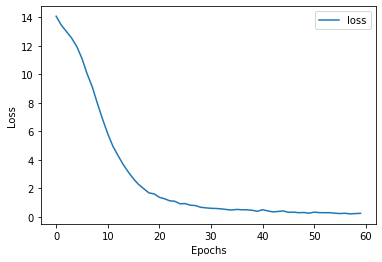

In [13]:
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [14]:
preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3]])
print ("Loss on training set= " + str(preds[0]))

31/31 [==============================] - 0s 8ms/step - loss: 4.3309 - dense_1_loss: 3.7964 - dense_3_loss: 0.4258 - dense_5_loss: 0.0540 - dense_7_loss: 0.0547 - dense_1_accuracy: 0.8371 - dense_3_accuracy: 0.9227 - dense_5_accuracy: 0.9835 - dense_7_accuracy: 0.9866           
Loss on training set= 4.330890655517578


In [15]:
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3]])
print ("Loss on testing set= " + str(preds[0]))

6/6 [==============================] - 0s 8ms/step - loss: 30.1926 - dense_1_loss: 28.0747 - dense_3_loss: 1.2821 - dense_5_loss: 0.5145 - dense_7_loss: 0.3212 - dense_1_accuracy: 0.0000e+00 - dense_3_accuracy: 0.6807 - dense_5_accuracy: 0.8193 - dense_7_accuracy: 0.8855
Loss on testing set= 30.192609786987305


In [16]:
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        img = img / 255.0 
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    result = np.reshape(res, (4, 36))
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) 

    capt = '' 
    for k in k_ind:
        capt += character[k]
    return capt 

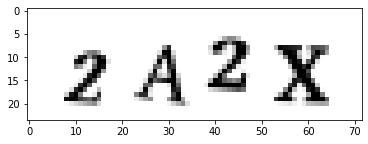

In [17]:
img=cv2.imread('./generated_captcha_images/2A2X.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [18]:
print("Predicted Captcha =",predict('./generated_captcha_images/2A2X.png'))

Predicted Captcha = 2A2X


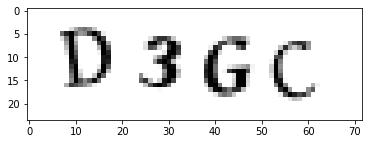

In [19]:
#Sample 2
img=cv2.imread('./generated_captcha_images/D3GC.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [20]:
print("Predicted Captcha =",predict('./generated_captcha_images/D3GC.png'))

Predicted Captcha = D3GC
